<a href="https://colab.research.google.com/github/anthony-anania/Project_2/blob/main/Project_2_(Exploration).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Is it possible to predict the selling price of cars?

Anthony Anania and Iris Guan

https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

We used the following dataset: CAR DETAILS FROM CAR DEKHO.csv

# Introduction

Have you ever wondered how much your car would cost you after owning it for a few years? Have you ever considered buying a new car? There are advantages and disadvantages to both. The following graphs and models used below will try and help us answer the two questions above. In order to answer the two questions, it is important to note that in order to make a prediction on the selling price of cars, we must follow a certain model that will try and predict the price of a car based on the data given below. The data that will be used for this prediction comes from an online community of data scientists and machine learning practitioners also known as kaggle. It is also worth mentioning that the prices of cars in the dataset seem ridiculously high. This is due to the fact that all selling prices in this dataset are in rupee's as opposed to Canadian or American currency.

# Data Pre-processing

[1] https://stackabuse.com/one-hot-encoding-in-python-with-pandas-and-scikit-learn/

Prior to loading the data to visualize and analyze it, we must import specific python libraries, which will facilitate our analysis and prediction. Before pre processing our data, we need to arrange the actual dataframe. As we load the data into a dataframe for the first time, we instantly notice the different names and models of the car. While that is important to us, it is not the most effective way to predict the selling prices of cars as each car model has a very low repitition rate. Machine learning teaches computers to think in a very similar way to how humans do. It works by exploring data and identifying specific patterns. Having said that, in order to make the most accurate prediction possible, there needs to be an increased amount of repetitive data so that the model can make its forecast on the most amount of data possible. That is the reason why an additional column was added. We named it 'manufacturer' and involved taking the first word of the name column. As we can see by the code below, the average repetition of each car manufacturer was close to 150, which surpasses the average repetition of each car name, which was closer to 3. Following our data manipulation is the pre processing of our data. We must first check and see if there are any missing values. If there are missing values, we can fill the missing data with the average of all the other values. As we can see, there are no missing values and that allows us to split our data into two variables: categorical variables and continuous variables. This is done to split up our number based data and our string based data. Most machine learning algorithms require numerical input and output variables. There was no pre processing done on the continuous variables because it would be meaningless to scale the values since we only have 1 column of continuous variables. By using the OneHotEncoder library, that will allow us to convert categorical data to integer data. Our computer now knows how to represent these categories, because it knows how to work with numbers. 'One hot Encoding is a type of representation in which all of the elements are 0, except for one, which has 1 as its value, where 1 represents a boolean specifying a category of the element.' (1) As we notice from our dataframe below, we joined our continuous variable with our pre processed categorical values. Each column from the original dataframe is being represented by showing each individual subset of the original column. That is why the columns of our dataframe show us x0 to x5 because that represents the original class of columns. For example, x0 are all the subsets of the column: year.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error
import math

In [3]:
car_df = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")

## Arrange dataframe

In [ ]:
car_df

NameError: ignored

In [ ]:
%time
car_df['name'].str.split(" ").str[0]

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs


0        Maruti
1        Maruti
2       Hyundai
3        Datsun
4         Honda
         ...   
4335    Hyundai
4336    Hyundai
4337     Maruti
4338    Hyundai
4339    Renault
Name: name, Length: 4340, dtype: object

In [ ]:
#checking the average repetition of each car name
car_df.groupby("name").size().mean()

2.9107981220657275

In [ ]:
car_df = car_df.set_index("name")

In [ ]:
#create new column for manufacturer name
for name in car_df.index:
  manufacturer = ""
  i = 0
  while i < len(name) and name[i] != " ":   #take the first word of the car name as the manufacturer name
    manufacturer = manufacturer + name[i]
    i += 1
  car_df.at[name,"manufacturer"] = manufacturer

car_df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,manufacturer
name,,,,,,,,
Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...,...,...,...
Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti


In [ ]:
#checking the average repetition of each car manufacturer
car_df.groupby("manufacturer").size().mean()

149.6551724137931

## Pre-processing

In [ ]:
#checking for missing values
car_df.isna().sum()

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
manufacturer     0
dtype: int64

In [ ]:
#define type of variables

continuous_vars = ["km_driven"]

categorical_vars = ["year",
                    "fuel",
                    "seller_type",
                    "transmission",
                    "owner",
                    "manufacturer"]

In [ ]:
#preprocess categorical data
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder

car_df = car_df.reset_index()

cat_encoder = OneHotEncoder(dtype=int)
corrected_categories = cat_encoder.fit_transform(car_df[categorical_vars]).toarray()

print(len(corrected_categories))
# print(type(corrected_categories))

col_index = cat_encoder.get_feature_names()   #for the column titles when putting preprocessed data into a dataframe
cat = cat_encoder.categories_
print(cat,len(cat))
print(col_index,len(col_index))

4340
[array([1992, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020]), array(['CNG', 'Diesel', 'Electric', 'LPG', 'Petrol'], dtype=object), array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object), array(['Automatic', 'Manual'], dtype=object), array(['First Owner', 'Fourth & Above Owner', 'Second Owner',
       'Test Drive Car', 'Third Owner'], dtype=object), array(['Ambassador', 'Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Datsun',
       'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar',
       'Jeep', 'Kia', 'Land', 'MG', 'Mahindra', 'Maruti', 'Mercedes-Benz',
       'Mitsubishi', 'Nissan', 'OpelCorsa', 'Renault', 'Skoda', 'Tata',
       'Toyota', 'Volkswagen', 'Volvo'], dtype=object)] 6
['x0_1992' 'x0_1995' 'x0_1996' 'x0_1997' 'x0_1998' 'x0_1999' 'x0_2000'
 'x0_2001' 'x0_2002' 'x0_2003' 'x0_2004' 'x0_2005' 'x0_2006' 'x0_2007'
 'x0_2008' 'x0_2009' '

In [ ]:
#create dataframe to be used in the machine learning part
preprocessed_vars = pd.DataFrame(corrected_categories,columns=col_index)  #change one-hot encoding into dataframe
preprocessed_vars = car_df[continuous_vars].join(preprocessed_vars)       #create dataframe with all variables for prediction
preprocessed_vars

,km_driven,x0_1992,x0_1995,x0_1996,x0_1997,x0_1998,x0_1999,x0_2000,x0_2001,x0_2002,x0_2003,x0_2004,x0_2005,x0_2006,x0_2007,x0_2008,x0_2009,x0_2010,x0_2011,x0_2012,x0_2013,x0_2014,x0_2015,x0_2016,x0_2017,x0_2018,x0_2019,x0_2020,x1_CNG,x1_Diesel,x1_Electric,x1_LPG,x1_Petrol,x2_Dealer,x2_Individual,x2_Trustmark Dealer,x3_Automatic,x3_Manual,x4_First Owner,x4_Fourth & Above Owner,x4_Second Owner,x4_Test Drive Car,x4_Third Owner,x5_Ambassador,x5_Audi,x5_BMW,x5_Chevrolet,x5_Daewoo,x5_Datsun,x5_Fiat,x5_Force,x5_Ford,x5_Honda,x5_Hyundai,x5_Isuzu,x5_Jaguar,x5_Jeep,x5_Kia,x5_Land,x5_MG,x5_Mahindra,x5_Maruti,x5_Mercedes-Benz,x5_Mitsubishi,x5_Nissan,x5_OpelCorsa,x5_Renault,x5_Skoda,x5_Tata,x5_Toyota,x5_Volkswagen,x5_Volvo
0,70000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,50000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,100000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,46000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,141000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,80000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4336,80000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4337,83000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4338,90000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Analysis (data exploration)

Now that we have pre processed all the data, below you will find some valuable information regarding the data. As we can see, the average selling price of a car according to our data is roughly 504 000 rupee's. The maximum number of kilometers driven by a car is 806599 km. Moreover, the average selling price of a car according to its manufacturer and the distance it drove is also shown beneath. For those who are a little more visual, we also plotted 3 graphs. The first graph shows the distribution of the average selling prices of cars amongst the different manufacturers. Land Rover is the most expensive followed by BMW, Mercedes-Benz and Volvo. The second graph describes the price of cars over the last 30 + years. We can see a gradual increase in the prices over the years. Lastly, the third graph displays the prices of cars depending on how many people have owned it. We observe that the least amount of owners it had, the higher the selling price of the car was.

In [ ]:
car_df["selling_price"].mean()

504127.3117511521

In [ ]:
car_df["selling_price"].max()

8900000

In [ ]:
car_df["km_driven"].max()

806599

In [ ]:
avg_selling_price_by_km_driven = car_df.groupby(["manufacturer", "km_driven"])["selling_price"].mean()

In [ ]:
avg_selling_price_by_km_driven

manufacturer  km_driven
Ambassador    50000        2.233333e+05
              120000       5.000000e+04
Audi          1500         4.700000e+06
              13000        8.900000e+06
              17000        3.256000e+06
                               ...     
Volkswagen    312000       3.500000e+05
Volvo         21000        1.975000e+06
              80000        4.500000e+06
              115992       1.750000e+06
              130000       2.000000e+06
Name: selling_price, Length: 1410, dtype: float64

## Plots

In [ ]:
#groupby manufacturer
manufacturer_group = car_df.groupby("manufacturer")["selling_price"].mean()

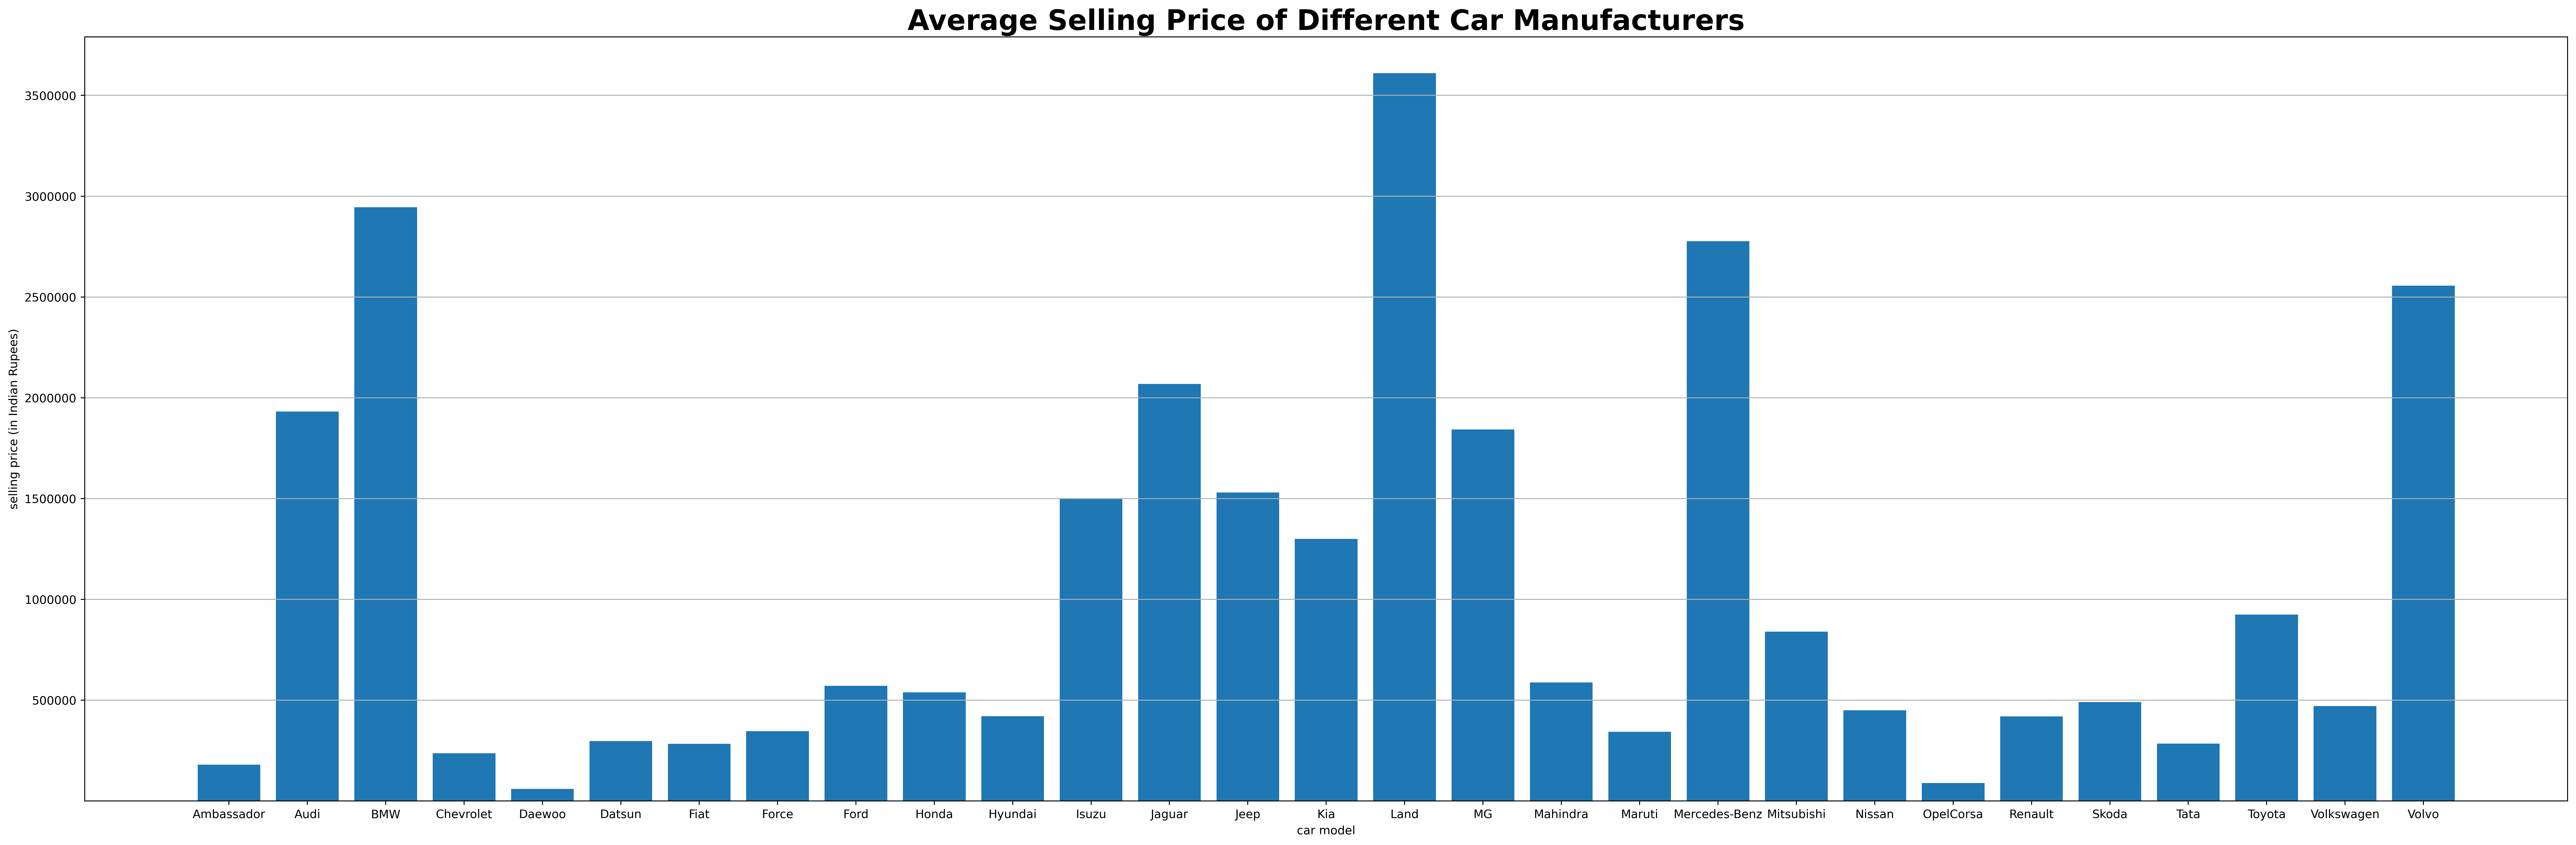

In [ ]:
plt.figure(figsize=[38,12],dpi=400)
plt.title("Average Selling Price of Different Car Manufacturers",
          fontdict={
              "size":24,
              "weight": "bold",
          })
plt.xlabel("car model")
plt.ylabel("selling price (in Indian Rupees)")
plt.yticks(ticks=[500000,1000000,1500000,2000000,2500000,3000000,3500000],
           labels=[500000,1000000,1500000,2000000,2500000,3000000,3500000])
plt.grid(axis="y")
plt.bar(manufacturer_group.index,manufacturer_group.values)
plt.show()

In [ ]:
#by year
year_group = car_df.groupby("year")["selling_price"].mean()

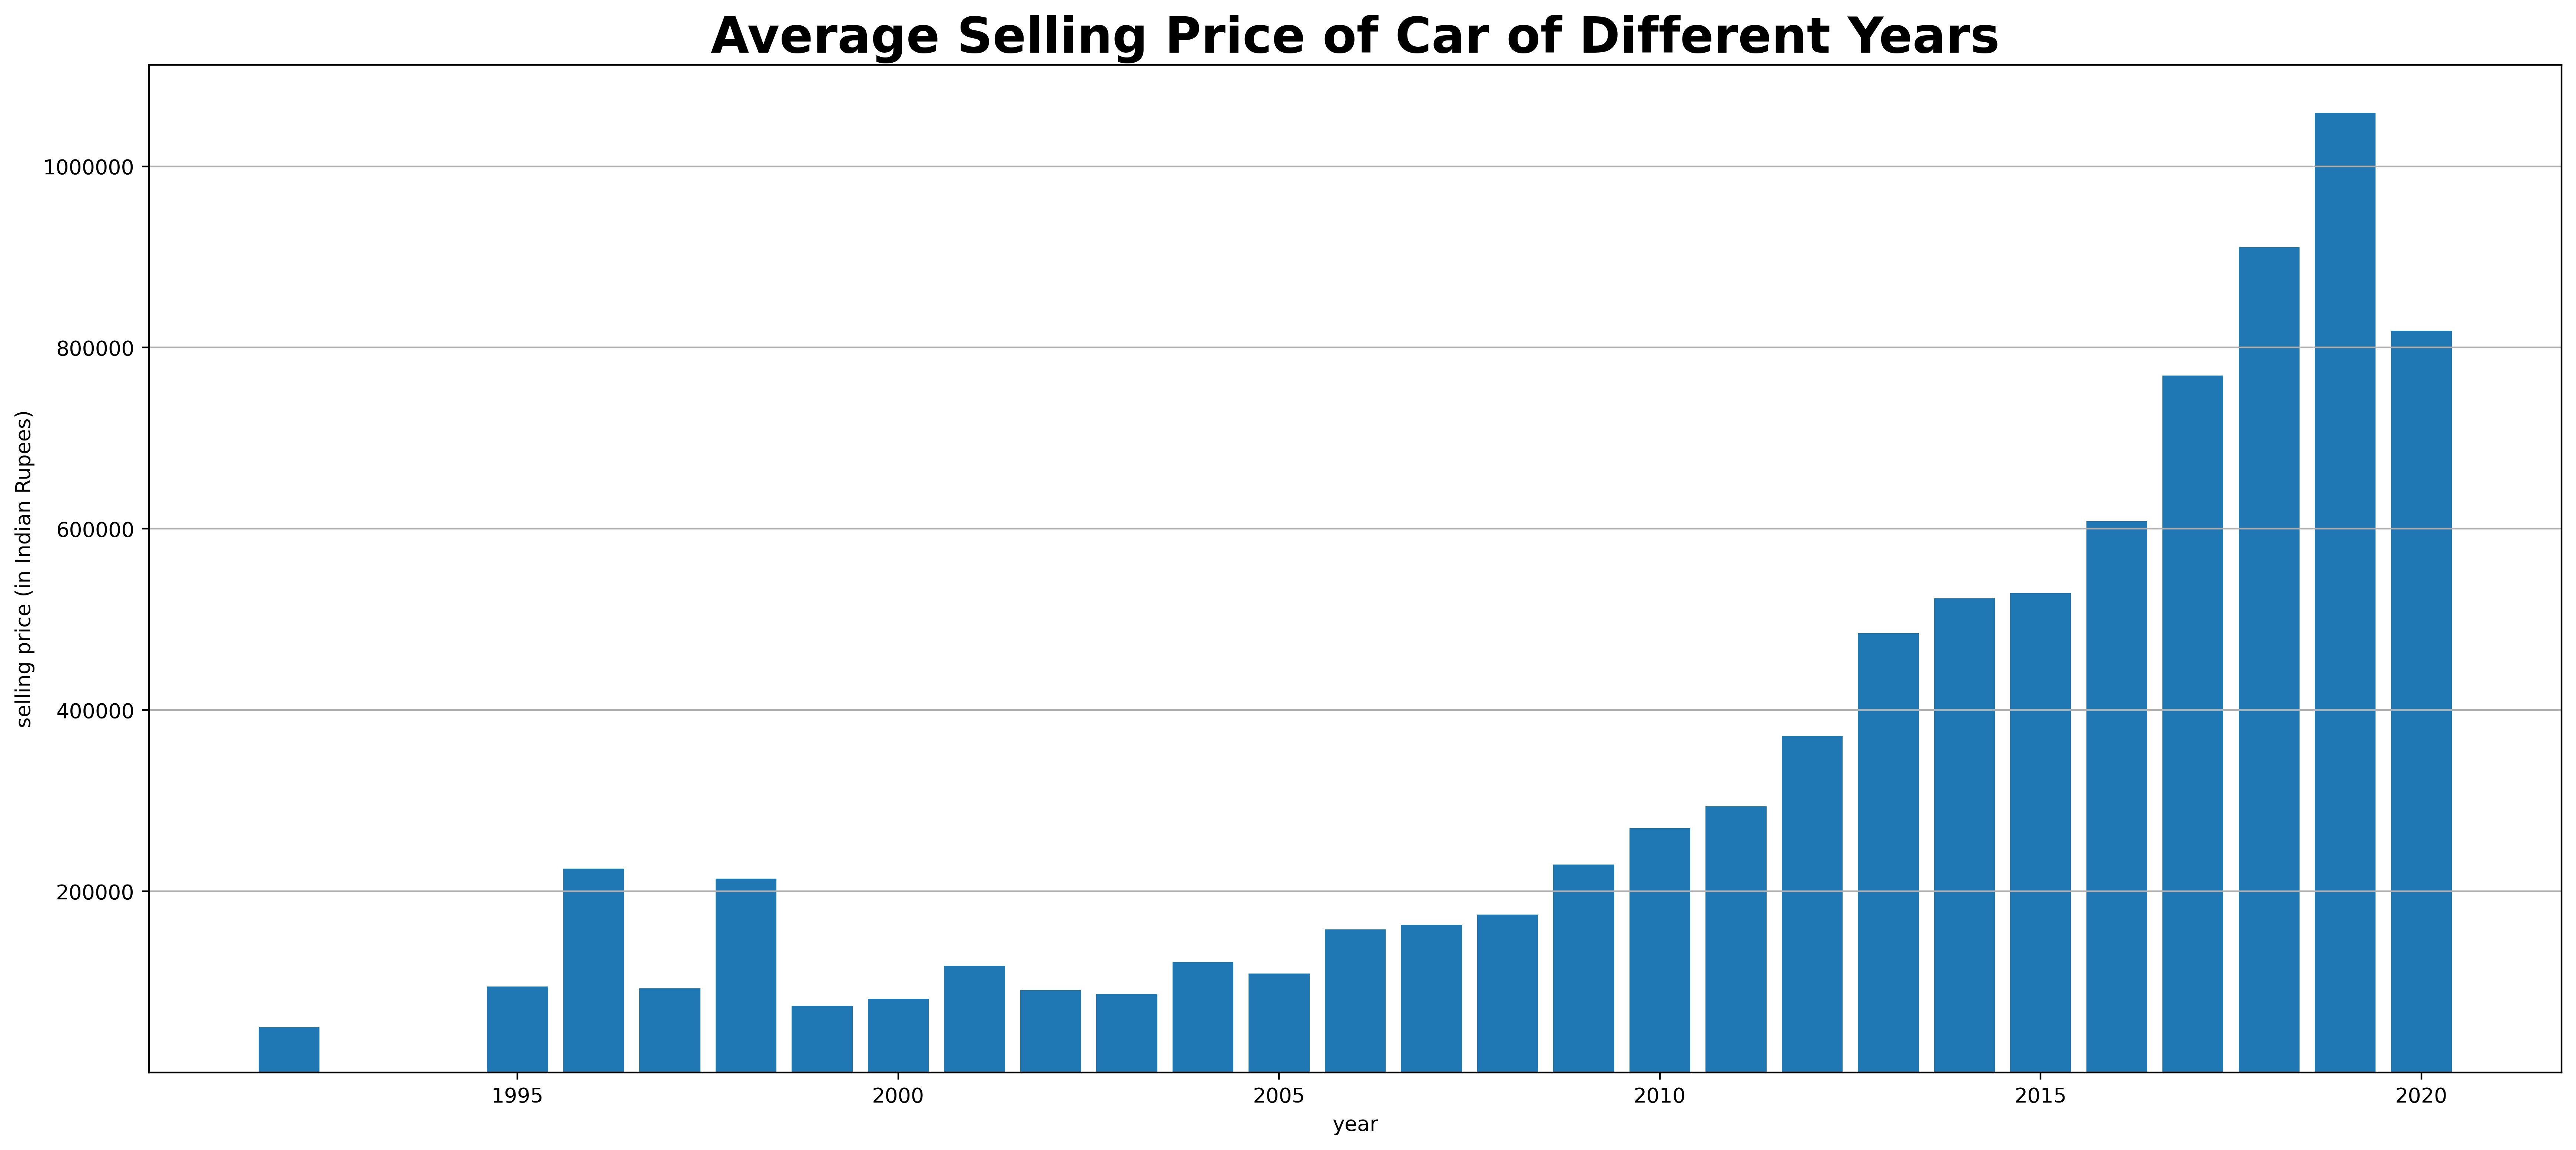

In [ ]:
plt.figure(figsize=[21,9],dpi=400)
plt.title("Average Selling Price of Car of Different Years",
          fontdict={
              "size":24,
              "weight": "bold",
          })
plt.xlabel("year")
plt.ylabel("selling price (in Indian Rupees)")
plt.yticks(ticks=[200000,400000,600000,800000,1000000],
           labels=[200000, 400000, 600000, 800000, 1000000])
plt.grid(axis="y")
plt.bar(year_group.index,year_group.values)
plt.show()

In [ ]:
#by owner
owner_group = car_df.groupby("owner")["selling_price"].mean()
list_owner = ["Test Drive Car",
              "First Owner",
              "Second Owner",
              "Third Owner",
              "Fourth & Above Owner"]

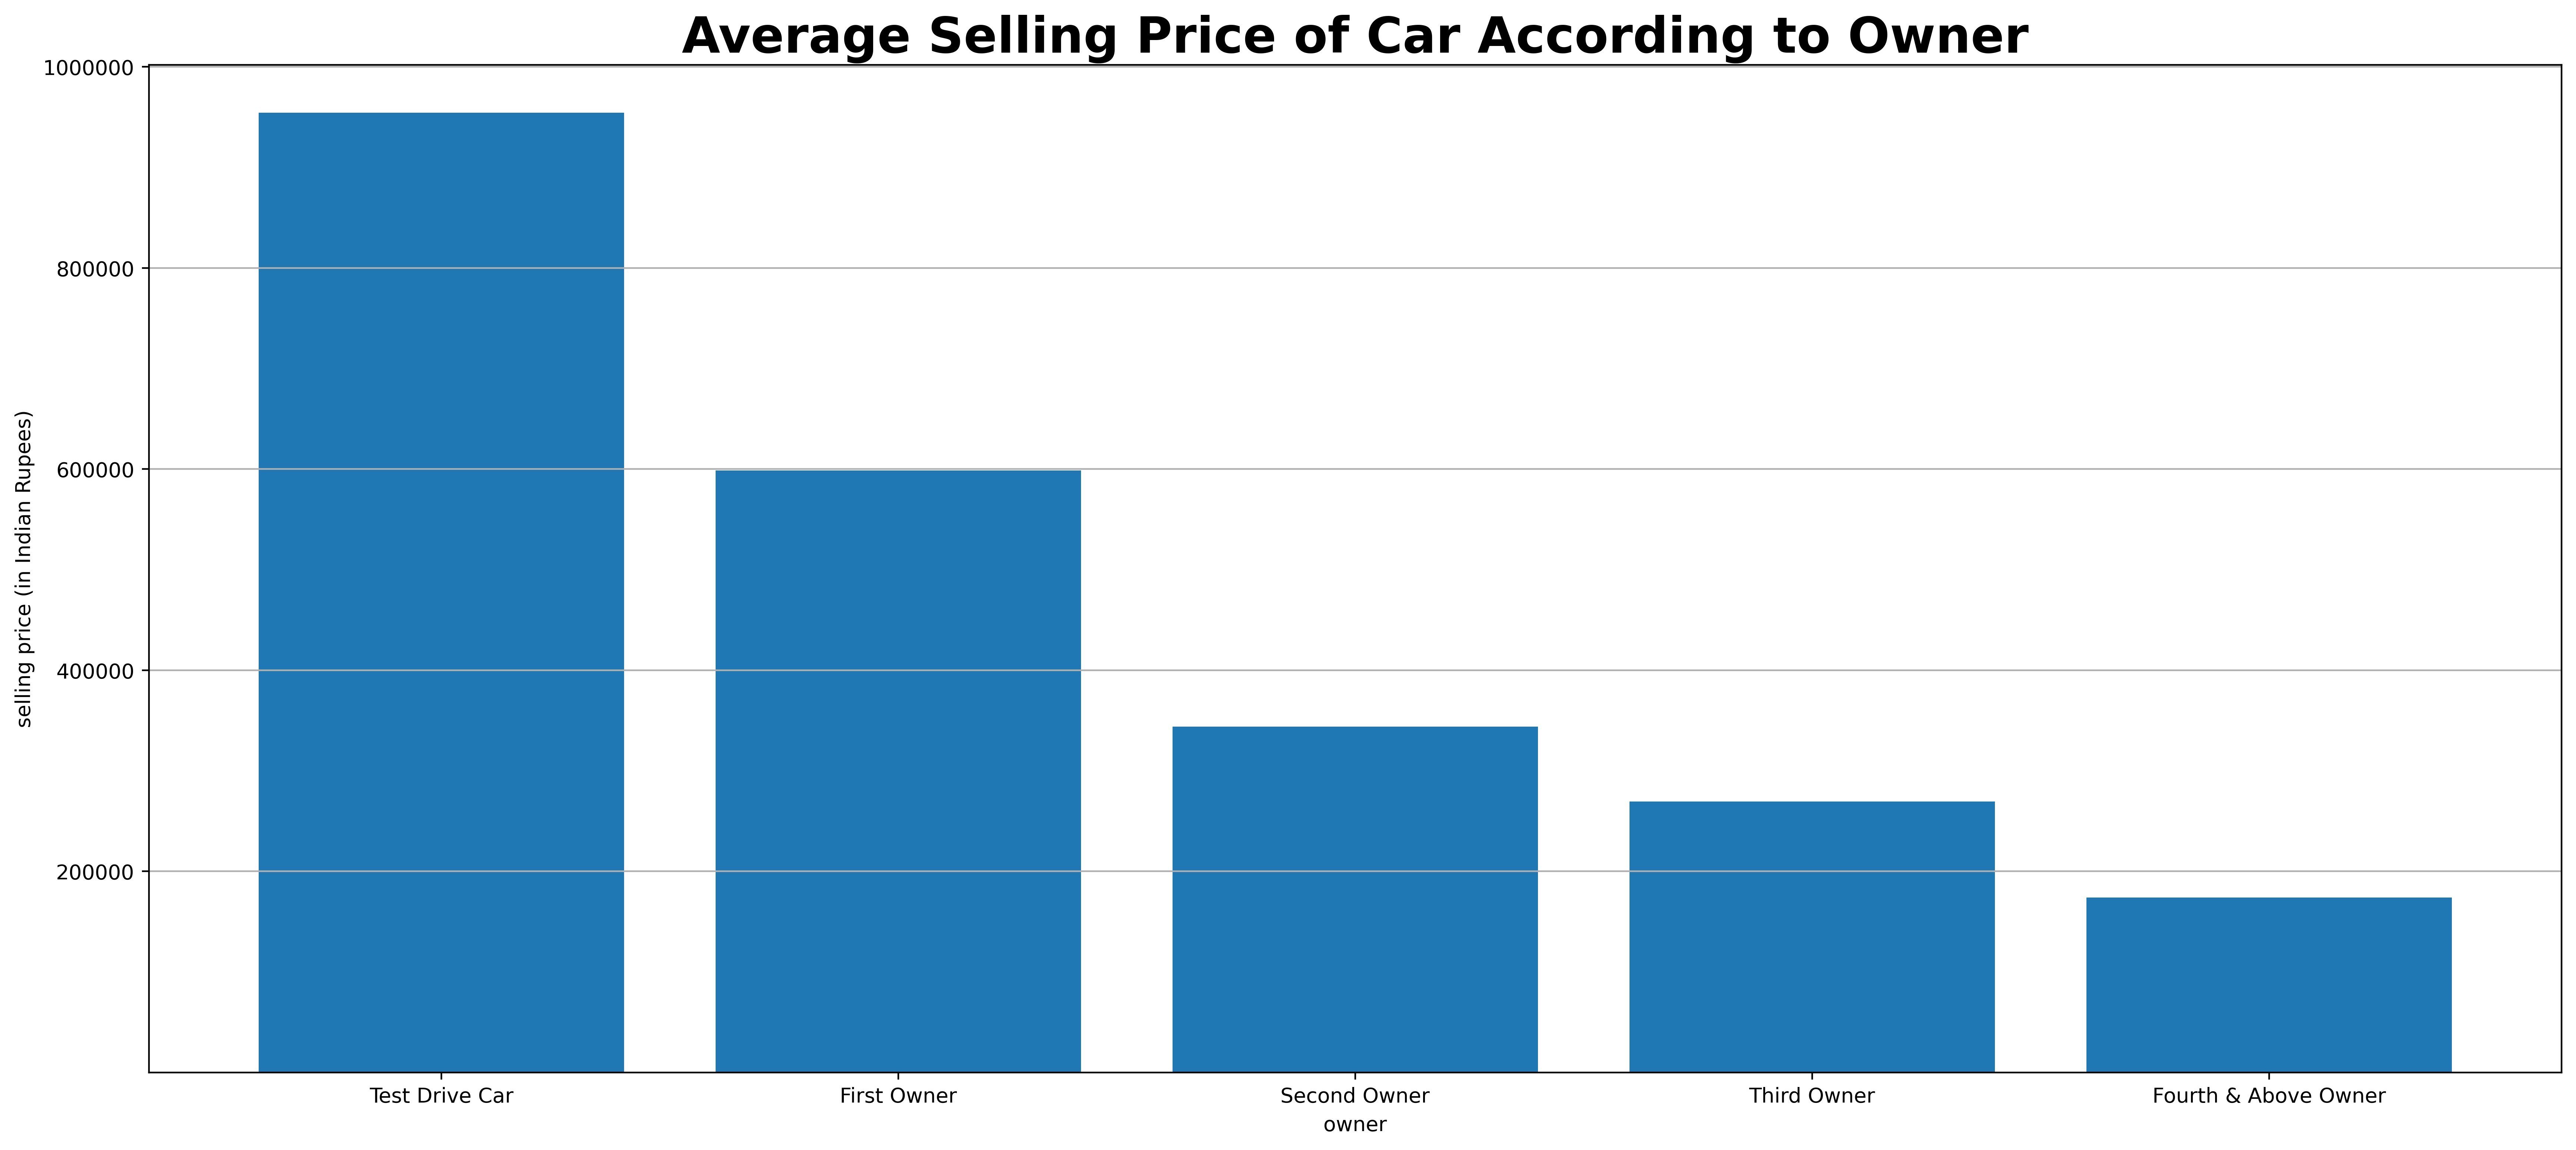

In [ ]:
plt.figure(figsize=[21,9],dpi=400)
plt.title("Average Selling Price of Car According to Owner",
          fontdict={
              "size":24,
              "weight": "bold",
          })
plt.xlabel("owner")
plt.ylabel("selling price (in Indian Rupees)")
plt.yticks(ticks=[200000,400000,600000,800000,1000000],
           labels=[200000, 400000, 600000, 800000, 1000000])
plt.grid(axis="y")
for owner in list_owner:
  plt.bar(owner,owner_group[owner],color="tab:blue")
plt.show()

# Modelling (Decision Tree Regressor)




References:
https://gdcoder.com/decision-tree-regressor-explained-in-depth/

https://medium.com/nothingaholic/understanding-the-mean-squared-error-df41e2c87958

The model being used to perform the prediction is known as a decision tree regressor. This model is used when the predicted outcome can be considered a  number. For example, in our case, the selling price of cars would return a real number. A decision tree model gives an estimate by asking a series of questions to the data, with each question narrowing our possible values until the model gets confident enough to make a single prediction. The order of the question as well as their content are being determined by the model. In addition, the questions asked  are all in a True/False form. During the training phase of model building, the model is fitted with any historical data that is relevant to the problem and the true value we want the model to learn to predict. The model learns any relationships between the data and the target variable. After the training phase, the decision tree produces a tree-like figure calculating the best questions as well as their order in order to make the most accurate estimates possible. The prediction will be an estimate based on the train data that it has been trained on. As shown below, two sets of data are created. One variable, which we call X will be our pre processed variables and our second variable Y, which is what we are using as a comparison will be the "selling price" column. The predictions that were made were shown to be 78% accurate resulting in roughly only 22% of our predictions being inaccurate. However, out of those being wrong, the mean error of incorrect predictions is a substantially high number. In other words, the predictions that were faulty were not only incorrect, but they were way off from being accurate. The discrepency between the true values and the predicted values was quite substantial. The mean squared error is the difference between the observed values and the predicted ones. We square each difference, so that negative and positive values do not cancel each other out. Then we take the average.
It is also worth mentioning that the higher the error value, the less representative the data actually is. Therefore, data that has a lower error value is considered to be more reliable.

## Model Fitting

In [ ]:
# created sets of data
X = preprocessed_vars
y = car_df["selling_price"]

In [ ]:
#fit data into the model
prediction_model = DecisionTreeRegressor()
prediction_model.fit(X=X,y=y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
#Compare predictions of the model with the actual selling price of the cars
df = pd.DataFrame({
    "prediction": prediction_model.predict(X),
    "true value": y
})
df

,prediction,true value
0,70000.0,60000
1,135000.0,135000
2,600000.0,600000
3,250000.0,250000
4,450000.0,450000
...,...,...
4335,396666.0,409999
4336,396666.0,409999
4337,115000.0,110000
4338,896499.5,865000


In [ ]:
#check average error to evaluate how good the model is
math.sqrt(mean_squared_error(y_true=y,y_pred=prediction_model.predict(X)))

53453.92066993817

In [ ]:
#percentage of predictions that were right
number_correct_predictions = df.loc[df["prediction"]==df["true value"]]["prediction"].count()
number_predictions = df["prediction"].count()
percentage_correct = (number_correct_predictions/number_predictions)*100
print(percentage_correct)

78.04147465437788


In [ ]:
#mean error of incorrect predictions
print(math.sqrt(mean_squared_error(y_true=df.loc[df["prediction"]!=df["true value"]]["true value"],y_pred=df.loc[df["prediction"]!=df["true value"]]["prediction"])))

114071.71717306742


# Conclusion

In conclusion, the selling price of a car can ultimately be foreseen using the decision tree regressor model used above. While it may not be the most accurate model, more than 3/4 of our predictions were accurate. It is definetly not a bad model by any means, but as a scientist and engineer, we are always striving for the most accurate results. In addition, the main problem with our model really has to be the percentage of inaccurate predictions because not only are they false, but the disparity between them is quite high.